<a href="https://colab.research.google.com/github/guptaa98/Kaggle-Notebooks/blob/master/Project_Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%matplotlib inline
#data manipulation
import numpy as np
import pandas as pd
#python imports
import math,time,random,datetime
#data visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project phase/50000 Sales Records.csv')

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [ ]:
len(df)

50000

In [ ]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,5.000000e+04,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04
mean,5.497330e+08,4999.61898,265.651350,187.322482,1.323716e+06,9.331574e+05,3.905587e+05
std,2.609179e+08,2884.33508,216.916752,175.580570,1.463891e+06,1.145548e+06,3.777588e+05
min,1.000132e+08,1.00000,9.330000,6.920000,2.799000e+01,2.076000e+01,7.230000e+00
25%,3.240070e+08,2498.00000,81.730000,35.840000,2.764871e+05,1.606370e+05,9.415092e+04
50%,5.504224e+08,5017.50000,154.060000,97.440000,7.813247e+05,4.671040e+05,2.795364e+05
75%,7.767824e+08,7493.25000,421.890000,263.330000,1.808642e+06,1.190390e+06,5.642867e+05
max,9.999995e+08,10000.00000,668.270000,524.960000,6.682032e+06,5.249075e+06,1.738178e+06


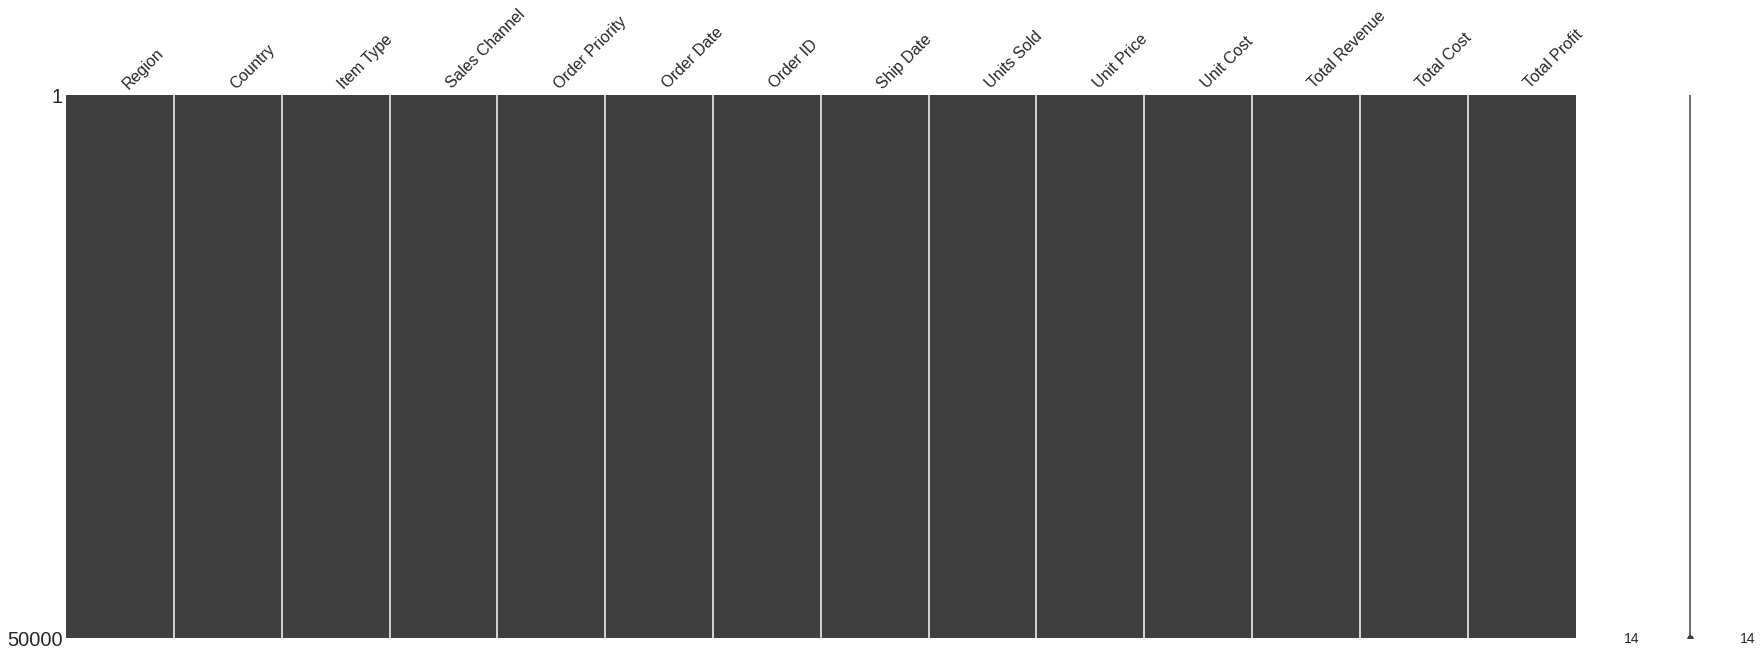

In [ ]:
missingno.matrix(df, figsize=(30,10))

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       50000 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  50000 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  int64  
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64
 11  Total Revenue   50000 non-null  float64
 12  Total Cost      50000 non-null  float64
 13  Total Profit    50000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.3+ MB


In [ ]:
df.shape

(50000, 14)

               Order ID  Units Sold  ...  Total Cost  Total Profit
Order ID       1.000000   -0.000234  ...    0.001665      0.001623
Units Sold    -0.000234    1.000000  ...    0.468651      0.593283
Unit Price    -0.000397   -0.007096  ...    0.750962      0.575675
Unit Cost     -0.000663   -0.006681  ...    0.761566      0.502958
Total Revenue  0.001722    0.519834  ...    0.987668      0.880111
Total Cost     0.001665    0.468651  ...    1.000000      0.794928
Total Profit   0.001623    0.593283  ...    0.794928      1.000000

[7 rows x 7 columns]


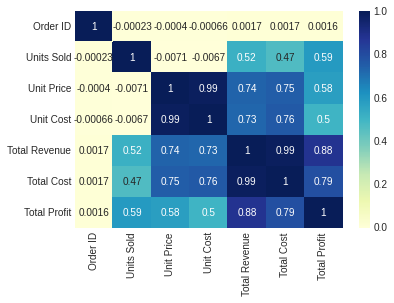

In [ ]:
print(df.corr()) 
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)   
# displaying heatmap 
plt.show()

In [ ]:
x = pd.DataFrame()
x = df

In [ ]:
x.corr()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,1.000000,-0.000234,-0.000397,-0.000663,0.001722,0.001665,0.001623
Units Sold,-0.000234,1.000000,-0.007096,-0.006681,0.519834,0.468651,0.593283
Unit Price,-0.000397,-0.007096,1.000000,0.985969,0.736209,0.750962,0.575675
Unit Cost,-0.000663,-0.006681,0.985969,1.000000,0.725742,0.761566,0.502958
Total Revenue,0.001722,0.519834,0.736209,0.725742,1.000000,0.987668,0.880111
Total Cost,0.001665,0.468651,0.750962,0.761566,0.987668,1.000000,0.794928
Total Profit,0.001623,0.593283,0.575675,0.502958,0.880111,0.794928,1.000000


In [ ]:
x.Region.value_counts()

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64


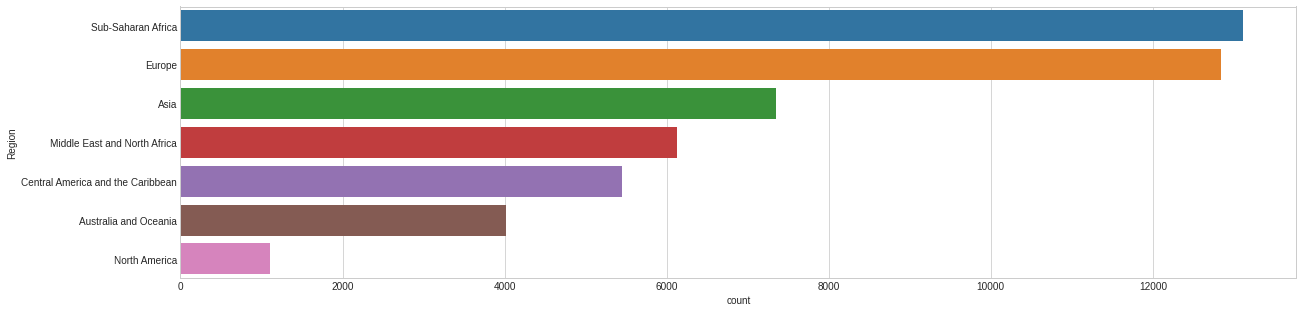

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Region',data=x);
print(x.Region.value_counts())

In [ ]:
x.Country.value_counts()

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Yemen                  238
Iran                   238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64

In [ ]:
c = x['Country']
v = set(c)
v

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda ',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Comoros',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Federated States of Micronesia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ira

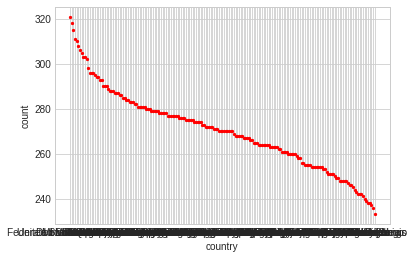

<Figure size 720x1440 with 0 Axes>

In [ ]:
k = x.Country.value_counts()
c = x['Country']
v = set(c)
country = []
country = list(v)
plt.scatter(country,k,c='red',s=5)
plt.xlabel('country')
plt.ylabel('count')
plt.figure(figsize=(10,20))
plt.show()

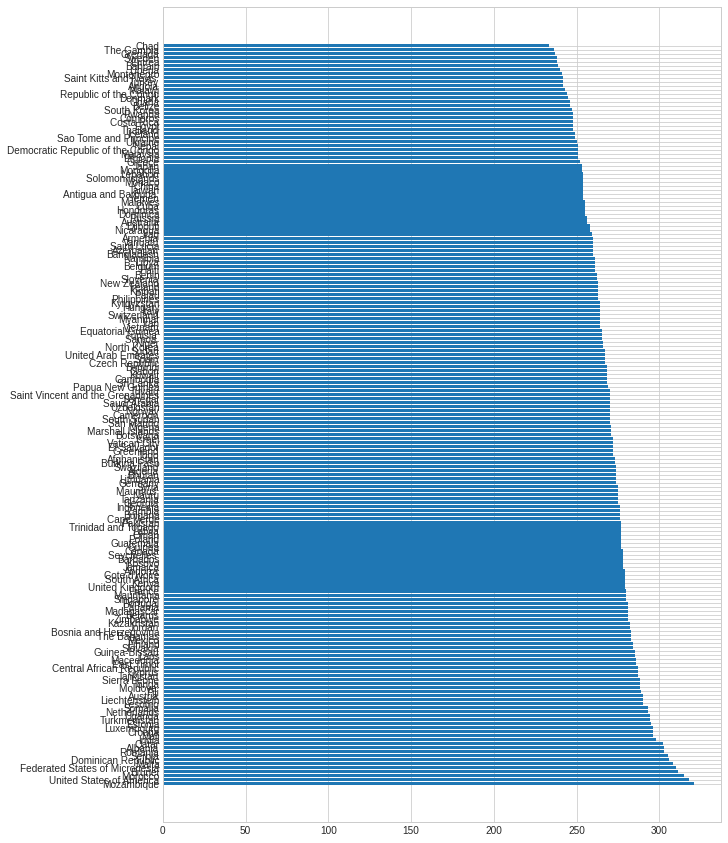

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(country,k)
plt.show()

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Yemen                  238
Iran                   238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64


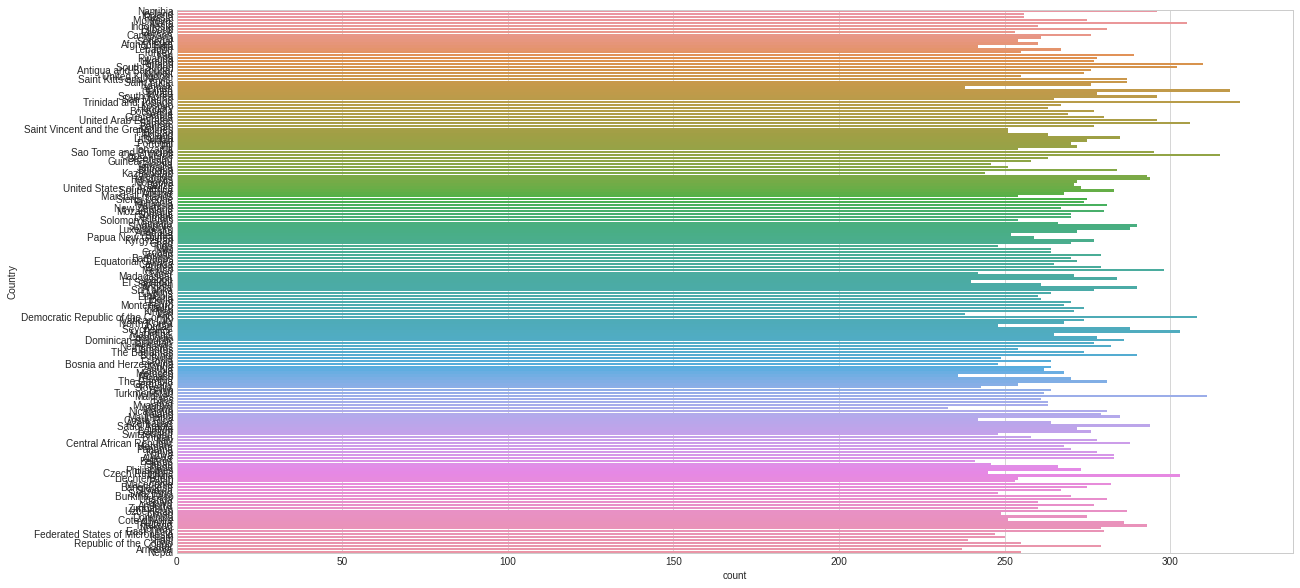

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.countplot(y='Country',data=x);
print(x.Country.value_counts())

In [ ]:
x['Sales Channel'].value_counts()

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64


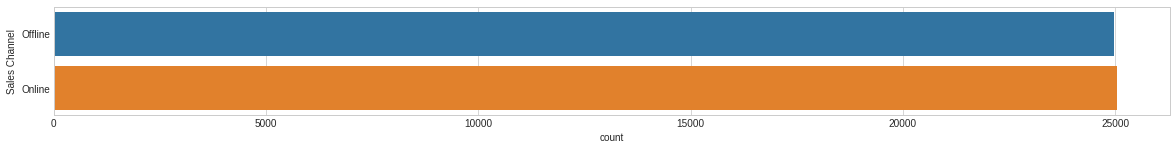

In [ ]:
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Sales Channel',data=x);
print(x['Sales Channel'].value_counts())

In [ ]:
x['Order Priority'].value_counts()         # l-Low, M-Medium, H-High, C-Critical

L    12588
M    12495
H    12471
C    12446
Name: Order Priority, dtype: int64

L    12588
M    12495
H    12471
C    12446
Name: Order Priority, dtype: int64


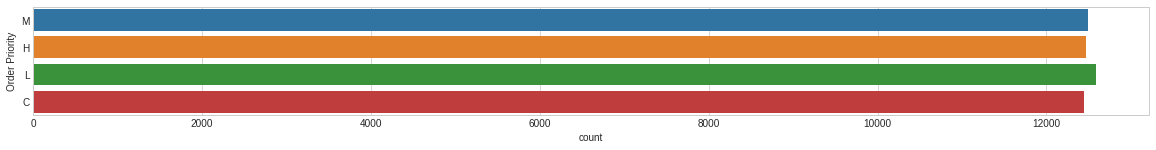

In [ ]:
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Order Priority',data=x);
print(x['Order Priority'].value_counts())

In [ ]:
x['Item Type'].value_counts()

Fruits             4221
Meat               4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Household          4139
Office Supplies    4139
Baby Food          4078
Name: Item Type, dtype: int64

Fruits             4221
Meat               4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Household          4139
Office Supplies    4139
Baby Food          4078
Name: Item Type, dtype: int64


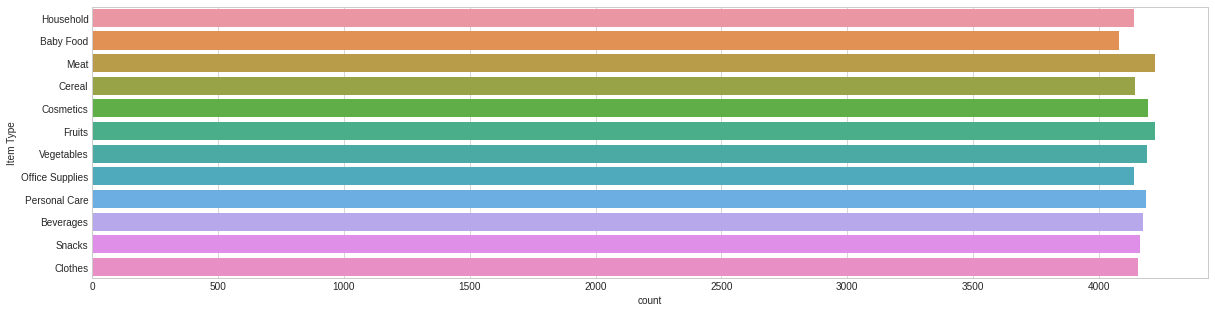

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Item Type',data=x);
print(x['Item Type'].value_counts())

In [ ]:
x['Order ID'].value_counts()

784031856    1
115453279    1
745377147    1
854558074    1
518488442    1
            ..
770372331    1
341703402    1
941263806    1
296584784    1
934545409    1
Name: Order ID, Length: 50000, dtype: int64

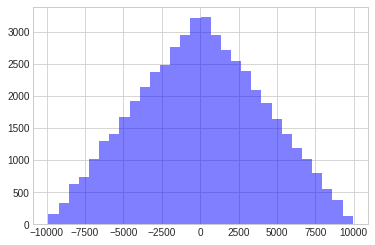

In [ ]:
plt.figure()
x['Units Sold'].diff().hist(color='b', alpha=0.5, bins=30)

In [ ]:
x['Units Sold'].skew()

-0.012963991339447662

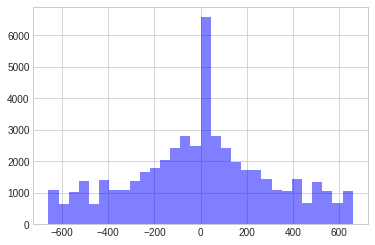

In [ ]:
plt.figure()
x['Unit Price'].diff().hist(color='b', alpha=0.5, bins=30)

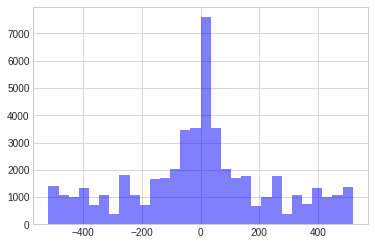

In [ ]:
plt.figure()
x['Unit Cost'].diff().hist(color='b', alpha=0.5, bins=30)

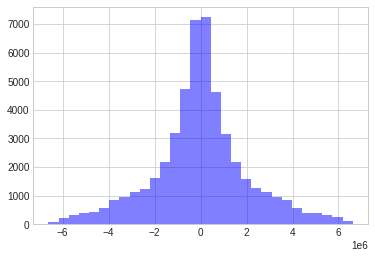

In [ ]:
plt.figure()
x['Total Revenue'].diff().hist(color='b', alpha=0.5, bins=30)

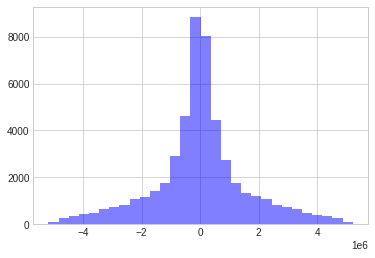

In [ ]:
plt.figure()
x['Total Cost'].diff().hist(color='b', alpha=0.5, bins=30)

In [ ]:
x['Order ID'].value_counts()

784031856    1
115453279    1
745377147    1
854558074    1
518488442    1
            ..
770372331    1
341703402    1
941263806    1
296584784    1
934545409    1
Name: Order ID, Length: 50000, dtype: int64

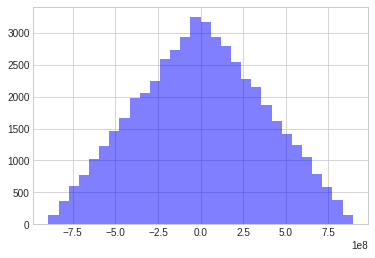

In [ ]:
plt.figure()
x['Order ID'].diff().hist(color='b', alpha=0.5, bins=30)

In [ ]:
x.drop('Order ID',axis=1,inplace=True)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [ ]:
x['Order Date'] = pd.to_datetime(x['Order Date'])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,2017-06-22,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2012-02-28,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,2010-08-12,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [ ]:
x['Ship Date'] = pd.to_datetime(x['Ship Date'])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,2011-01-09,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,2017-06-22,2017-06-25,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2012-02-28,2012-03-20,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,2010-08-12,2010-09-13,1975,205.70,117.11,406257.50,231292.25,174965.25


In [ ]:
x.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
x['Order Date_year'] = x['Order Date'].dt.year
x['Order Date_month'] = x['Order Date'].dt.month
x['Order Date_day'] = x['Order Date'].dt.day
x['Ship Date_year'] = x['Ship Date'].dt.year
x['Ship Date_month'] = x['Ship Date'].dt.month
x['Ship Date_day'] = x['Ship Date'].dt.day
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,2011-01-09,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,2017-06-22,2017-06-25,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,2012-02-28,2012-03-20,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,2010-08-12,2010-09-13,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [ ]:
x.drop('Order Date',axis=1,inplace=True)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,2011-01-09,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,2017-06-25,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,2012-03-20,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,2010-09-13,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [ ]:
x.drop('Ship Date',axis=1,inplace=True)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


24    1736
20    1715
28    1713
8     1701
4     1696
14    1691
21    1686
10    1684
18    1679
23    1671
12    1669
1     1664
22    1656
25    1656
19    1646
26    1635
9     1629
7     1628
15    1619
2     1617
16    1616
27    1612
3     1606
11    1600
13    1596
5     1567
6     1566
17    1542
29    1505
30    1482
31     917
Name: Order Date_day, dtype: int64


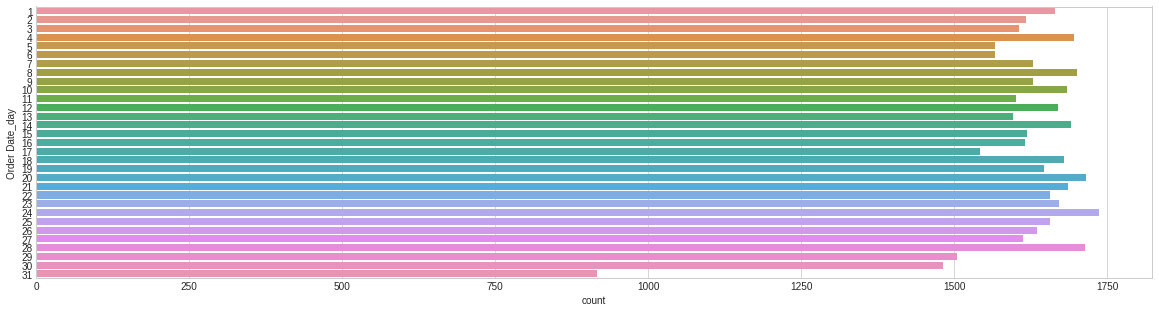

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Order Date_day',data=x);
print(x['Order Date_day'].value_counts())

5     4571
1     4408
3     4354
7     4341
6     4311
4     4277
2     4136
12    3992
10    3948
8     3935
11    3906
9     3821
Name: Order Date_month, dtype: int64


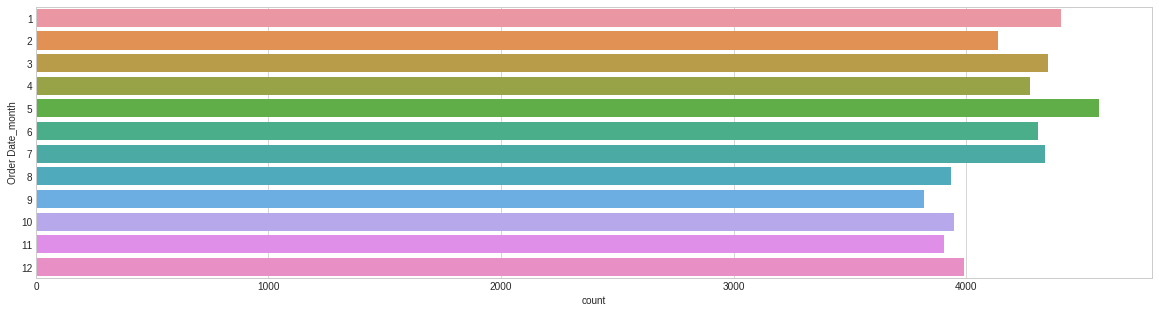

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Order Date_month',data=x);
print(x['Order Date_month'].value_counts())

2011    6757
2012    6634
2014    6596
2010    6594
2015    6570
2016    6551
2013    6523
2017    3775
Name: Order Date_year, dtype: int64


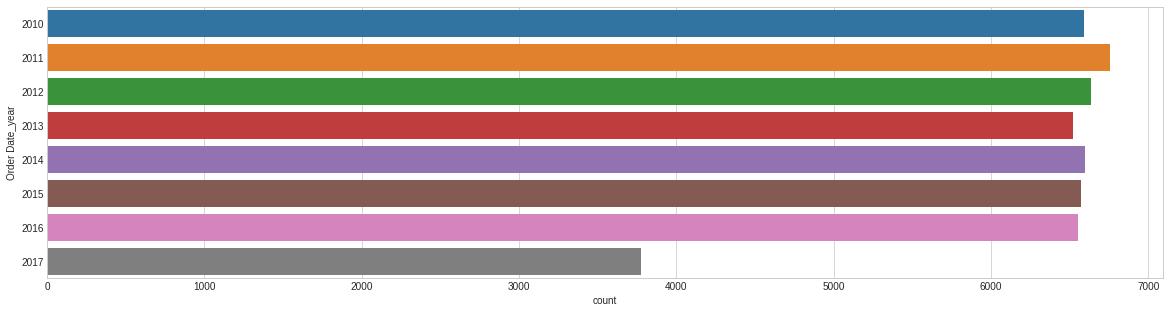

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Order Date_year',data=x);
print(x['Order Date_year'].value_counts())

5     1718
6     1705
10    1698
12    1697
15    1696
28    1685
7     1670
23    1662
16    1658
22    1652
24    1651
18    1651
17    1646
9     1645
27    1643
14    1642
2     1642
11    1640
4     1639
21    1636
8     1628
1     1616
26    1608
3     1606
19    1604
13    1598
25    1598
20    1575
29    1504
30    1450
31     937
Name: Ship Date_day, dtype: int64


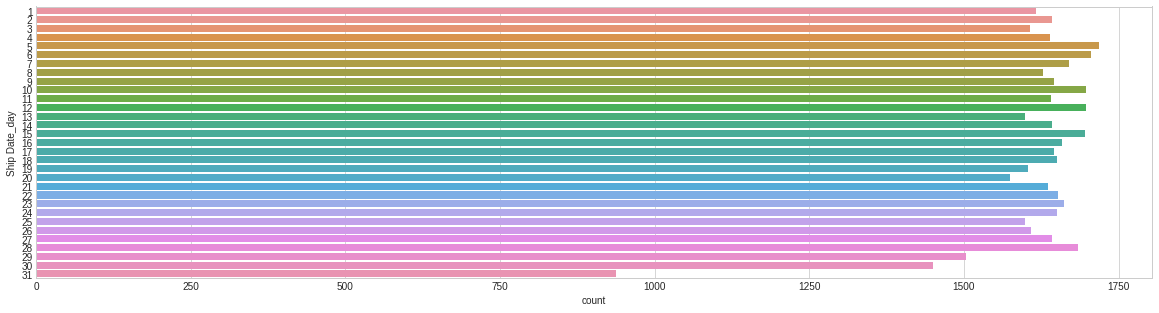

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Ship Date_day',data=x);
print(x['Ship Date_day'].value_counts())

3     4515
5     4461
7     4435
6     4362
8     4266
4     4246
1     4206
10    3933
12    3927
2     3913
9     3869
11    3867
Name: Ship Date_month, dtype: int64


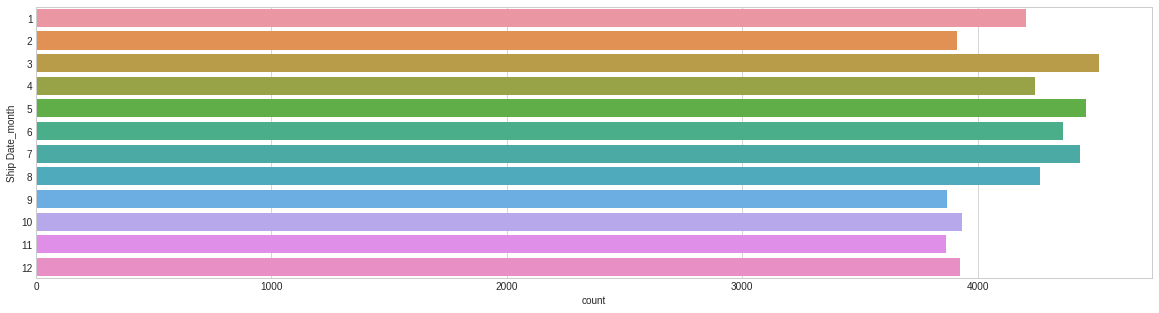

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Ship Date_month',data=x);
print(x['Ship Date_month'].value_counts())

2011    6787
2012    6620
2016    6611
2014    6581
2013    6547
2015    6522
2010    6107
2017    4225
Name: Ship Date_year, dtype: int64


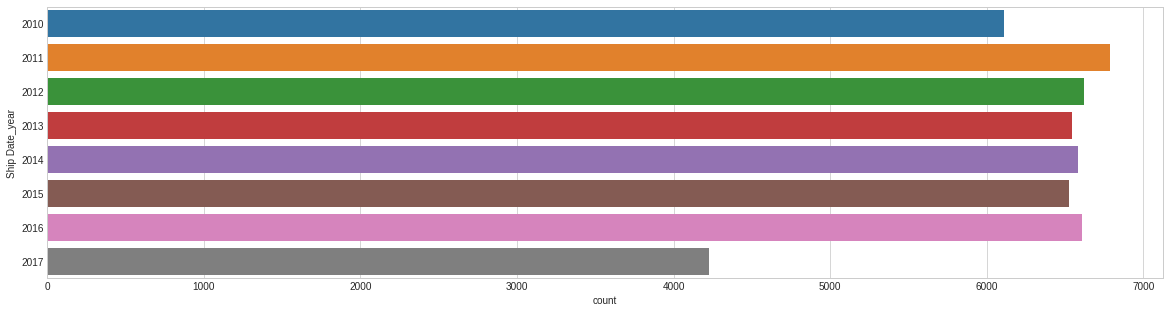

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Ship Date_year',data=x);
print(x['Ship Date_year'].value_counts())

In [ ]:
Order_Priority_dict = {'L':1, 'M':2, 'H':3, 'C':4}
x['Order Priority'] = x['Order Priority'].map(Order_Priority_dict)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [ ]:
x['Item Type'].value_counts()

Fruits             4221
Meat               4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Household          4139
Office Supplies    4139
Baby Food          4078
Name: Item Type, dtype: int64

In [ ]:
Item_Type_dict = {'Meat':1,'Fruits':2,'Cosmetics':3,'Vegetables':4,'Personal Care':5,'Beverages':6,'Snacks':7,
                 'Clothes':8, 'Cereal':9, 'Household':0, 'Office Supplies':10 , 'Baby Food':11}
x['Item Type'] = x['Item Type'].map(Item_Type_dict)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,0,Offline,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,11,Online,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,1,Online,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,1,Online,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,9,Online,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [ ]:
x['Sales Channel'].value_counts()

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64

In [ ]:
Sales_Channel_dict = {'Online':1 , 'Offline':0}
x['Sales Channel'] = x['Sales Channel'].map(Sales_Channel_dict)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,Europe,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,Europe,Russia,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,Europe,Moldova,1,1,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,Europe,Malta,9,1,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [ ]:
x['Region'].value_counts()

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64

In [ ]:
Region_dict = {'Sub-Saharan Africa':0,'Europe':1,'Asia':2,'Middle East and North Africa':3,
              'Central America and the Caribbean':4,'Australia and Oceania':5,'North America':6}
x['Region'] = x['Region'].map(Region_dict)

In [ ]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,1,Russia,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,1,Moldova,1,1,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,1,Malta,9,1,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [ ]:
x['Country'].value_counts()

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Yemen                  238
Iran                   238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64

In [ ]:
# Import label encoder 
from sklearn import preprocessing   
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()   
# Encode labels in column 'Country'. 
x['Country']= label_encoder.fit_transform(x['Country'])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,111,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,67,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,1,132,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,1,104,1,1,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,1,99,9,1,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [ ]:
x['Country'].value_counts()

168    321
62     318
27     315
97     311
52     310
      ... 
70     238
182    238
6      237
105    236
95     233
Name: Country, Length: 185, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']] = scaler.fit_transform(x[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,0.0,0.333333,3604,668.27,502.54,0.360433,0.345040,597290.92,2015,8,31,2015,10,12
1,0.166667,0.364130,1.000000,1.0,0.666667,8435,255.28,159.42,0.322247,0.256177,808579.10,2010,11,20,2011,1,9
2,0.166667,0.717391,0.090909,1.0,0.000000,4848,421.89,364.69,0.306090,0.336822,277305.60,2017,6,22,2017,6,25
3,0.166667,0.565217,0.090909,1.0,0.000000,7225,421.89,364.69,0.456170,0.501969,413270.00,2012,2,28,2012,3,20
4,0.166667,0.538043,0.818182,1.0,0.333333,1975,205.70,117.11,0.060795,0.044060,174965.25,2010,8,12,2010,9,13


In [ ]:
x[['Units Sold','Unit Price','Unit Cost']] = scaler.fit_transform(x[['Units Sold','Unit Price','Unit Cost']])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,0.0,0.333333,0.360336,1.000000,0.956721,0.360433,0.345040,597290.92,2015,8,31,2015,10,12
1,0.166667,0.364130,1.000000,1.0,0.666667,0.843484,0.373251,0.294379,0.322247,0.256177,808579.10,2010,11,20,2011,1,9
2,0.166667,0.717391,0.090909,1.0,0.000000,0.484748,0.626096,0.690622,0.306090,0.336822,277305.60,2017,6,22,2017,6,25
3,0.166667,0.565217,0.090909,1.0,0.000000,0.722472,0.626096,0.690622,0.456170,0.501969,413270.00,2012,2,28,2012,3,20
4,0.166667,0.538043,0.818182,1.0,0.333333,0.197420,0.298009,0.212706,0.060795,0.044060,174965.25,2010,8,12,2010,9,13


In [ ]:
x[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']] = scaler.fit_transform(x[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,0.0,0.333333,0.360336,1.000000,0.956721,0.360433,0.345040,597290.92,0.714286,0.636364,1.000000,0.714286,0.818182,0.366667
1,0.166667,0.364130,1.000000,1.0,0.666667,0.843484,0.373251,0.294379,0.322247,0.256177,808579.10,0.000000,0.909091,0.633333,0.142857,0.000000,0.266667
2,0.166667,0.717391,0.090909,1.0,0.000000,0.484748,0.626096,0.690622,0.306090,0.336822,277305.60,1.000000,0.454545,0.700000,1.000000,0.454545,0.800000
3,0.166667,0.565217,0.090909,1.0,0.000000,0.722472,0.626096,0.690622,0.456170,0.501969,413270.00,0.285714,0.090909,0.900000,0.285714,0.181818,0.633333
4,0.166667,0.538043,0.818182,1.0,0.333333,0.197420,0.298009,0.212706,0.060795,0.044060,174965.25,0.000000,0.636364,0.366667,0.000000,0.727273,0.400000


In [ ]:
x.corr()

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
Region,1.000000,0.004553,0.000346,-0.001622,-0.003168,0.000848,-0.000279,0.001107,0.000500,0.002773,0.002414,-0.001589,-0.003075,0.002337,-0.002391,-0.000341
Item Type,0.004553,1.000000,0.007487,0.000345,-0.000026,-0.154280,-0.185540,-0.112147,-0.139795,-0.010667,0.003684,-0.000887,-0.001070,0.003678,-0.000180,0.003372
Sales Channel,0.000346,0.007487,1.000000,-0.000692,0.003565,-0.001921,-0.001671,-0.000139,-0.000405,0.000690,-0.005746,0.002820,-0.007697,-0.006137,0.006263,0.001644
Order Priority,-0.001622,0.000345,-0.000692,1.000000,-0.004655,0.004763,0.004389,0.002319,0.002303,0.002004,-0.002117,-0.000368,0.005072,-0.002106,-0.000186,0.002586
Units Sold,-0.003168,-0.000026,0.003565,-0.004655,1.000000,-0.007096,-0.006681,0.519834,0.468651,0.593283,0.001248,0.002463,-0.004497,0.001077,0.003344,-0.005107
Unit Price,0.000848,-0.154280,-0.001921,0.004763,-0.007096,1.000000,0.985969,0.736209,0.750962,0.575675,0.001148,-0.004187,-0.005915,0.000644,-0.000828,-0.003664
Unit Cost,-0.000279,-0.185540,-0.001671,0.004389,-0.006681,0.985969,1.000000,0.725742,0.761566,0.502958,0.000210,-0.003332,-0.006201,-0.000216,-0.000687,-0.002766
Total Revenue,0.001107,-0.112147,-0.000139,0.002319,0.519834,0.736209,0.725742,1.000000,0.987668,0.880111,0.003462,-0.001438,-0.009485,0.003101,-0.000226,-0.005439
Total Cost,0.000500,-0.139795,-0.000405,0.002303,0.468651,0.750962,0.761566,0.987668,1.000000,0.794928,0.001848,-0.001210,-0.009663,0.001527,-0.000378,-0.004354
Total Profit,0.002773,-0.010667,0.000690,0.002004,0.593283,0.575675,0.502958,0.880111,0.794928,1.000000,0.007812,-0.001903,-0.007452,0.007385,0.000270,-0.007875


In [ ]:
x.skew()

Region              0.638936
Item Type           0.009011
Sales Channel      -0.002720
Order Priority      0.005178
Units Sold         -0.012964
Unit Price          0.735888
Unit Cost           0.893408
Total Revenue       1.581942
Total Cost          1.756618
Total Profit        1.292324
Order Date_year     0.051303
Order Date_month    0.061570
Order Date_day     -0.005490
Ship Date_year      0.038203
Ship Date_month     0.046113
Ship Date_day       0.018445
dtype: float64

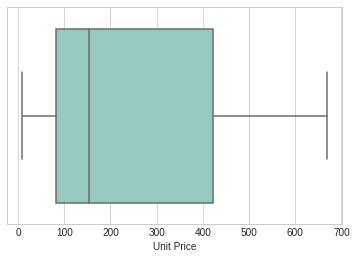

In [ ]:
sns.boxplot(x['Unit Price'],palette = "Set3")

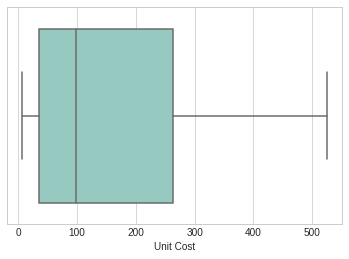

In [ ]:
sns.boxplot(x['Unit Cost'],palette = "Set3")

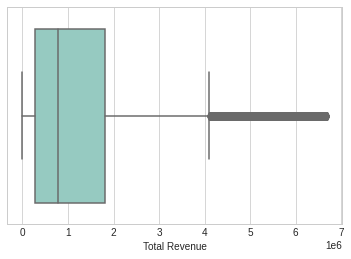

In [ ]:
sns.boxplot(x['Total Revenue'],palette = "Set3")

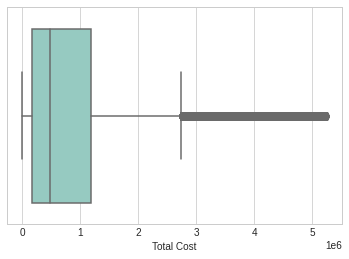

In [ ]:
sns.boxplot(x['Total Cost'],palette = "Set3")

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return (lower_range,upper_range)

In [ ]:
lowerbound,upperbound = outlier_treatment(x['Total Cost'])

In [ ]:
x[(x['Total Cost'] < lowerbound) | (x['Total Cost'] > upperbound)]['Total Cost'] 

22       4790260.00
27       4828057.12
34       3153941.04
49       5132533.92
55       3265798.95
            ...    
49973    3593161.00
49976    4428562.56
49978    4555022.56
49984    3998208.24
49996    3046342.88
Name: Total Cost, Length: 4856, dtype: float64

In [ ]:
x.drop(x[(x['Total Cost'] > upperbound) | (x['Total Cost'] < lowerbound) ].index , inplace=True)

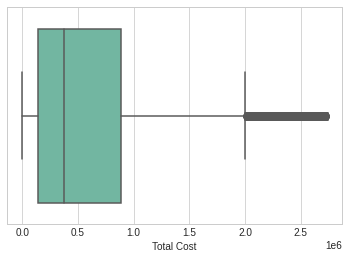

In [ ]:
sns.boxplot(x['Total Cost'],palette = "Set2")

In [ ]:
lowerbound,upperbound = outlier_treatment(x['Total Revenue'])

In [ ]:
x[(x['Total Revenue'] < lowerbound) | (x['Total Revenue'] > upperbound)]['Total Revenue']

9        3458689.20
25       3611709.20
31       3488369.40
39       4353637.60
44       3177904.80
            ...    
49895    3483691.51
49896    3249537.90
49924    3430229.91
49944    3489705.94
49980    4007375.20
Name: Total Revenue, Length: 1718, dtype: float64

In [ ]:
x.drop(x[(x['Total Revenue'] > upperbound) | (x['Total Revenue'] < lowerbound) ].index , inplace=True)

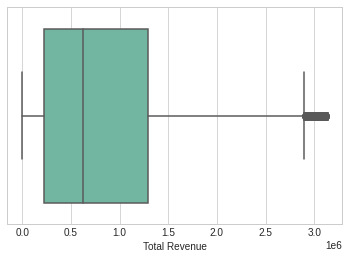

In [ ]:
sns.boxplot(x['Total Revenue'],palette = "Set2")

In [ ]:
x.corr()

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
Region,1.000000,0.004192,-0.001052,0.000315,-0.004143,0.001283,-0.000025,0.001820,0.000799,0.003663,0.002633,-0.000123,-0.002553,0.002425,-0.000581,0.000643
Item Type,0.004192,1.000000,0.005240,0.002265,0.092394,-0.111455,-0.172341,0.031323,-0.063831,0.233136,0.004865,-0.001569,-0.004296,0.004783,-0.000472,0.000827
Sales Channel,-0.001052,0.005240,1.000000,-0.000071,0.006399,-0.001514,-0.001303,0.004802,0.004291,0.004877,-0.004491,0.002293,-0.008324,-0.004951,0.005942,0.003970
Order Priority,0.000315,0.002265,-0.000071,1.000000,-0.007260,0.005447,0.005179,0.000114,0.000273,-0.000261,-0.003293,-0.000636,0.003941,-0.003082,-0.002023,-0.000567
Units Sold,-0.004143,0.092394,0.006399,-0.007260,1.000000,-0.282875,-0.287167,0.404993,0.306407,0.533000,-0.001296,0.004541,-0.001992,-0.001259,0.004782,-0.004001
Unit Price,0.001283,-0.111455,-0.001514,0.005447,-0.282875,1.000000,0.982707,0.605135,0.660789,0.351399,-0.002354,-0.004510,-0.002214,-0.002608,-0.001568,-0.003867
Unit Cost,-0.000025,-0.172341,-0.001303,0.005179,-0.287167,0.982707,1.000000,0.571787,0.661938,0.249675,-0.002414,-0.003265,-0.002563,-0.002575,-0.001163,-0.003231
Total Revenue,0.001820,0.031323,0.004802,0.000114,0.404993,0.605135,0.571787,1.000000,0.970262,0.847547,-0.003404,0.001537,-0.007408,-0.003293,0.001493,-0.006901
Total Cost,0.000799,-0.063831,0.004291,0.000273,0.306407,0.660789,0.661938,0.970262,1.000000,0.693878,-0.004531,0.002394,-0.008189,-0.004344,0.001714,-0.006046
Total Profit,0.003663,0.233136,0.004877,-0.000261,0.533000,0.351399,0.249675,0.847547,0.693878,1.000000,-0.000191,-0.000675,-0.004084,-0.000272,0.000683,-0.007272


In [ ]:
x.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,1,Russia,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25


In [ ]:
x = df.drop('Total Profit',axis = 1)
y = pd.DataFrame()
y = df['Total Profit']

In [ ]:
y.head()

0    597290.92
1    808579.10
2    277305.60
3    413270.00
4    174965.25
Name: Total Profit, dtype: float64

In [ ]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,0.0,0.333333,0.360336,1.000000,0.956721,0.360433,0.345040,0.714286,0.636364,1.000000,0.714286,0.818182,0.366667
1,0.166667,0.364130,1.000000,1.0,0.666667,0.843484,0.373251,0.294379,0.322247,0.256177,0.000000,0.909091,0.633333,0.142857,0.000000,0.266667
2,0.166667,0.717391,0.090909,1.0,0.000000,0.484748,0.626096,0.690622,0.306090,0.336822,1.000000,0.454545,0.700000,1.000000,0.454545,0.800000
3,0.166667,0.565217,0.090909,1.0,0.000000,0.722472,0.626096,0.690622,0.456170,0.501969,0.285714,0.090909,0.900000,0.285714,0.181818,0.633333
4,0.166667,0.538043,0.818182,1.0,0.333333,0.197420,0.298009,0.212706,0.060795,0.044060,0.000000,0.636364,0.366667,0.000000,0.727273,0.400000


In [ ]:
df.dtypes

Region              float64
Country             float64
Item Type           float64
Sales Channel       float64
Order Priority      float64
Units Sold          float64
Unit Price          float64
Unit Cost           float64
Total Revenue       float64
Total Cost          float64
Total Profit        float64
Order Date_year     float64
Order Date_month    float64
Order Date_day      float64
Ship Date_year      float64
Ship Date_month     float64
Ship Date_day       float64
dtype: object

In [ ]:
df.to_csv(r'/content/drive/MyDrive/Project phase/Sales_project_phaseII.csv')

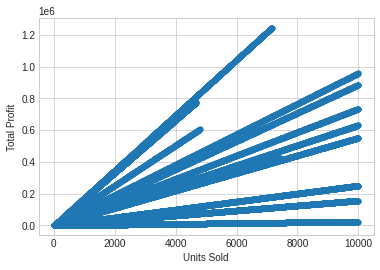

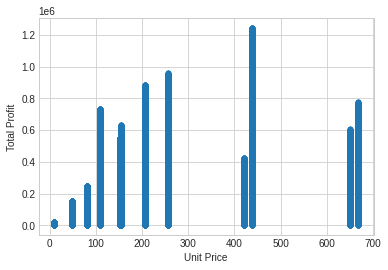

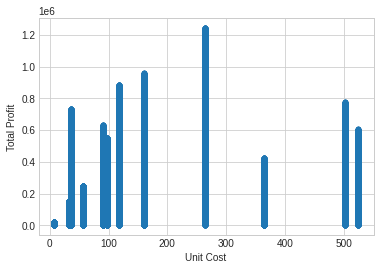

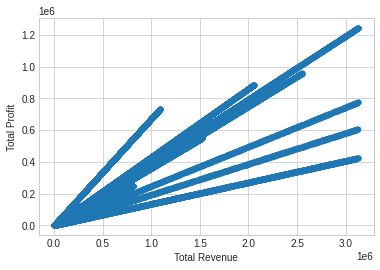

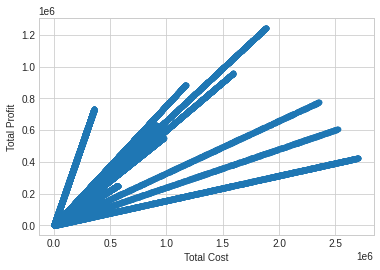

In [ ]:
col = []
col = ['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost']
for i in range(len(col)):
  df.plot(kind='scatter', x=col[i], y='Total Profit') ;
  plt.show()